#**Tutorial **

Neste tutorial vamos:
- conversão de espaços de cores
  - BRG
  - RBG
  - HSI
  


##Passo 1: Carregar as dependências

*   [Numpy](https://www.numpy.org/) é uma biblioteca para manipular matrizes/vetores.
*   [Pandas](https://pandas.pydata.org/) é uma biblioteca para manipular e analisar dados.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) é uma biblioteca com diversas funcionalidades de visão computacional.
*   [Skimage](https://scikit-image.org/) é uma biblioteca que suporta aplicações de processamento de imagem em python.
*   [PIL](https://pypi.org/project/Pillow/) é uma biblioteca que adiciona suporte à abertura e gravação de muitos formatos de imagem diferentes.
*   [Matplotlib](https://matplotlib.org/) é uma biblioteca que gera figuras e gráficos.









In [2]:
import numpy as np
import pandas as pd
import cv2
# from google.colab.patches import cv2_imshow # para exibir imagens dentro do COLAB
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

##Passo 2: Conversão automática

Explorar as conversões de modelos de cores em Python utilizando o OpenCV e NumPy, com exemplos de como abrir uma imagem, convertê-la entre diferentes espaços de cores e exercícios para praticar esses conceitos.

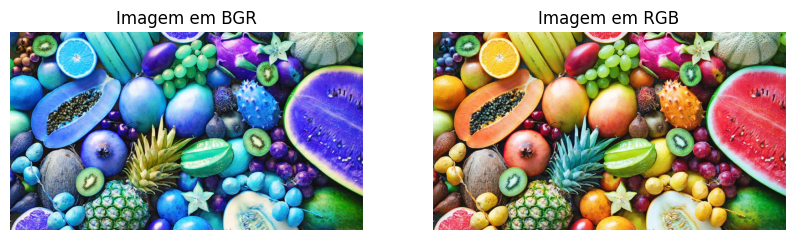

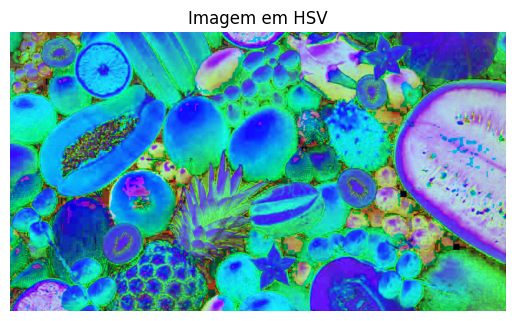

In [4]:
# permite que seja utilizada imagens do computador. Faz o upload do arquivo do seu computador para a nuvem aqui do Colab
# caso estivesse programando numa IDE no seu computador ao invés do Colab, não precisaria deste comando, bastaria informar o diretório completo dentro do imread

# from google.colab import files
# uploaded = files.upload()

# Carregando a imagem em BGR (padrão do OpenCV)
# Altere 'sua_imagem.jpg' para o caminho da sua imagem no Colab
#imagem_bgr = cv2.imread('sua_imagem.jpg')  # Lê a imagem em BGR
imagem_bgr = cv2.imread('frutas.jpg')  # Lê a imagem em BGR

# Convertendo de BGR para RGB
# No OpenCV, a imagem é carregada em BGR, então precisamos convertê-la para RGB
imagem_rgb = cv2.cvtColor(imagem_bgr, cv2.COLOR_BGR2RGB)

# Exibindo a imagem original e a imagem convertida em RGB
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem_bgr)  # Exibindo a imagem BGR
plt.title('Imagem em BGR')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagem_rgb)  # Exibindo a imagem em RGB
plt.title('Imagem em RGB')
plt.axis('off')
plt.show()

# Convertendo a imagem para HSV
imagem_hsv = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2HSV)

# Exibindo a imagem no espaço de cor HSV
plt.imshow(imagem_hsv)
plt.title('Imagem em HSV')
plt.axis('off')
plt.show()


##Passo 3: Conversão manual

Explorar as conversões de modelos de cores em Python utilizando o OpenCV e NumPy, com exemplos de como abrir uma imagem, convertê-la entre diferentes espaços de cores e exercícios para praticar esses conceitos.

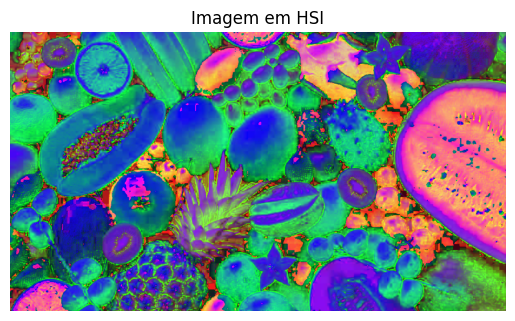

In [5]:
# Conversão manual para o modelo HSI (simplificada)
# Normalizando a imagem RGB para valores entre 0 e 1
imagem_rgb_norm = imagem_rgb / 255.0

# Separando os canais
R, G, B = imagem_rgb_norm[..., 0], imagem_rgb_norm[..., 1], imagem_rgb_norm[..., 2]

# Calculando o valor de intensidade (I)
I = (R + G + B) / 3

# Calculando o valor de saturação (S)
S = 1 - (3 / (R + G + B + 1e-6) * np.minimum(np.minimum(R, G), B))

# Calculando o valor de matiz (H)
num = 0.5 * ((R - G) + (R - B))
denom = np.sqrt((R - G)**2 + (R - B) * (G - B)) + 1e-6
theta = np.arccos(num / denom)

H = np.where(B > G, 2 * np.pi - theta, theta)  # Ajusta o ângulo se B > G
H = H / (2 * np.pi)  # Normalizando entre 0 e 1

# Compondo a imagem HSI
imagem_hsi = np.dstack((H, S, I))

# 8. Exibindo a imagem no modelo HSI
plt.imshow(imagem_hsi)
plt.title('Imagem em HSI')
plt.axis('off')
plt.show()

# Exercícios para os Alunos
# Exercício 1:

# Exercício 2: Manipule o canal de saturação da imagem HSI para aumentar a saturação em 30% e exiba o resultado.
# Dica: Multiplique o canal de saturação (S) por 1.3 e reconstrua a imagem HSI.



#### FAÇA #1: Reconversão de HSV para RGB.

Converta a imagem de volta de HSV para RGB e exiba-a.

Dica: Use a função cv2.cvtColor(imagem_hsv, cv2.COLOR_HSV2RGB)

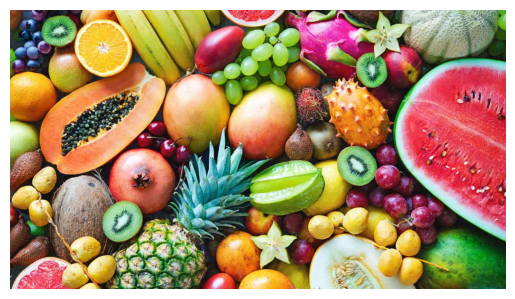

In [8]:
# FAÇA AQUI O SEU CÓDIGO
imagem_rgb2 = cv2.cvtColor(imagem_hsv, cv2.COLOR_HSV2RGB)

plt.imshow(imagem_rgb2)
plt.title('')
plt.axis('off')
plt.show()


#### FAÇA #2: Manipulação do canal de saturação na imagem HSI.

Manipule o canal de saturação da imagem HSI para aumentar a saturação em 30% e exiba o resultado.

Dica: Multiplique o canal de saturação (S) por 1.3 e reconstrua a imagem HSI.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Imagem HSI com 30% de saturação a mais')

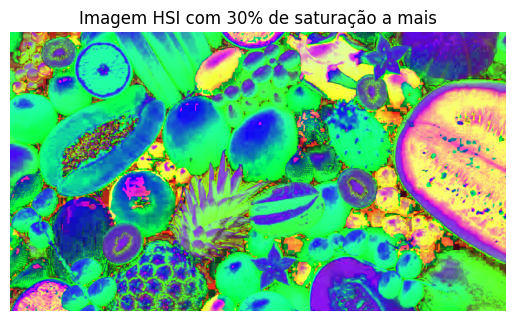

In [14]:
S2 = S*1.3

imagem_hsi2 = np.dstack((H , S2, I))

plt.imshow(imagem_hsi2)
plt.axis('off')
plt.title('Imagem HSI com 30% de saturação a mais')